### Problem Statement 

As an owner of a startup, you wish to forecast the sales of your product to plan how much money should be spent on advertisements. This is because the sale of a product is usually proportional to the money spent on advertisements.

Predict the impact of TV advertising on your product sales by performing simple linear regression analysis. 





---

### List of Activities

**Activity 1:** Analysing the dataset

  
**Activity 2:**  Train-Test split

**Activity 3:**  Model training

**Activity 4:** Plotting the best fit line

**Activity 5:** Model prediction





---


#### Activity 1:  Analysing the Dataset

Create a Pandas DataFrame for **Advertising-Sales** dataset using the below link. This dataset contains information about the money spent on the TV, radio and newspaper advertisement (in thousand dollars) and their generated sales (in thousand units). The dataset consists of examples that are divided by 1000.

  **Source:** https://www.kaggle.com/ishaanv/ISLR-Auto

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/advertising.csv

Also, print the first five rows of the dataset. Check for null values and treat them accordingly.




In [ ]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Load the dataset
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/advertising.csv')
df.head()

# Print first five rows using head() function


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Split the DataFrame into the training and test sets.

from sklearn.model_selection import train_test_split

x=df['TV']
y=df['Sales']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

---

#### Activity 3: Model Training

Train the simple regression model using the **training data** to obtain the best fit line $y = mx + c$. For this, perform the following tasks:

1. Create following two functions:

 - A function `errors_product()` that calculates the errors for the feature and target variables i.e. $(x_i - \bar{x})(y_i - \bar{y})$

 - A function `squared_errors()` that calculates the squared errors for the feature variable only i.e. $(x_i - \bar{x})^2$

2. Calculate the **slope** and **intercept** values for the best fit line by applying the following formulae:
 $$slope\Rightarrow m = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}=\frac{ errors\_product().sum()}{squared\_errors().sum()}$$

 $$intercept \Rightarrow c = \bar{y} - m \bar{x}$$



In [ ]:
# Create the 'errors_product()' and 'squared_errors()' function.

def error_product():
  prod=(X_train-X_train.mean())*(y_train-y_train.mean())
  return prod

def squared_errors():
  sq_errors=(X_train-X_train.mean())**2
  return sq_errors


In [ ]:
# Calculate the slope and intercept values for the best fit line.

slope=error_product().sum()/squared_errors().sum()

intercept=y_train.mean()-slope*X_train.mean()

print(f'slope={slope} intercept={intercept}')


slope=0.055698944351506 intercept=7.127012656133822


**Q:** What is the equation obtained for the best fit line of this model?

**A:** Sales=0.0557 * TV + 7.1270

---

#### Activity 4: Plotting the Best Fit Line

After obtaining the slope and intercept values for the best fit line, plot this line along with the scatter plot to see how well it fits the points.


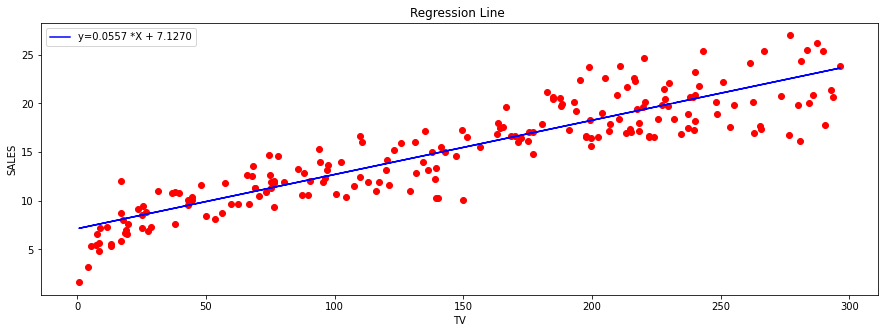

In [ ]:
#  Plot the regression line in the scatter plot between Sales and TV advertisment values.


x=df['TV']
y=slope*x+intercept


plt.figure(figsize=[15,5])
plt.scatter(x,df['Sales'],color='red')
plt.plot(x,y,color='blue',label='y=0.0557 *X + 7.1270')
plt.xlabel("TV")
plt.ylabel('SALES')
plt.title('Regression Line ')
plt.legend()
plt.show()

---

#### Activity 5: Model Prediction

For the TV advertising of $50,000, what is prediction for Sales? In order to predict this value, perform the following task:

- Based on the regression line, create a function `sales_predicted()` which takes a budget to be used for TV advertising as an input and returns the corresponding units of Sales.
- Call the function `sales_predicted()` and pass the amount spent on TV advertising. 

**Note:** To predict the sales for TV advertising of $50,000, pass 50 as parameter to `sales_predicted()` function as the original data of this dataset consists of examples that are divided by 1000. Also, the value obtained after calling `sales_predicted(50)` must be multiplied by 1000 to obtain the predicted units of sales.



In [ ]:
#Create a function which takes TV advertisement value as an input and returns the sales.

def pred(tv):
  return 0.0557 *tv+7.1270

print(f'Predictided sales values is {round(pred(50)*1000)}')
# Calculating sales value against $50,000 spent in TV ads



Predictided sales values is 9912


**Q:** If you are planning to invest $50,000 dollars in TV advertising, how many unit of sales can be predicted according to this simple linear regression model?

**A:** 9912